<p>The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.</p>

<p>This dataset contains 3 files: The one taken for study is diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is <b>not balanced.</b></p>

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
dfdiabetes=pd.read_csv('Data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [52]:
dfdiabetes.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [53]:
dfdiabetes.shape

(253680, 22)

In [54]:
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [55]:
dfdiabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [56]:
dfdiabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [57]:
dfdiabetes.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [58]:
dfdiabetesdupli=dfdiabetes.duplicated()
dfdiabetesdupli

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

In [59]:
dfdiabetes=dfdiabetes.drop_duplicates()

In [60]:
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [61]:
dfdiabetes.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

<AxesSubplot: >

C:\Users\Manjusha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


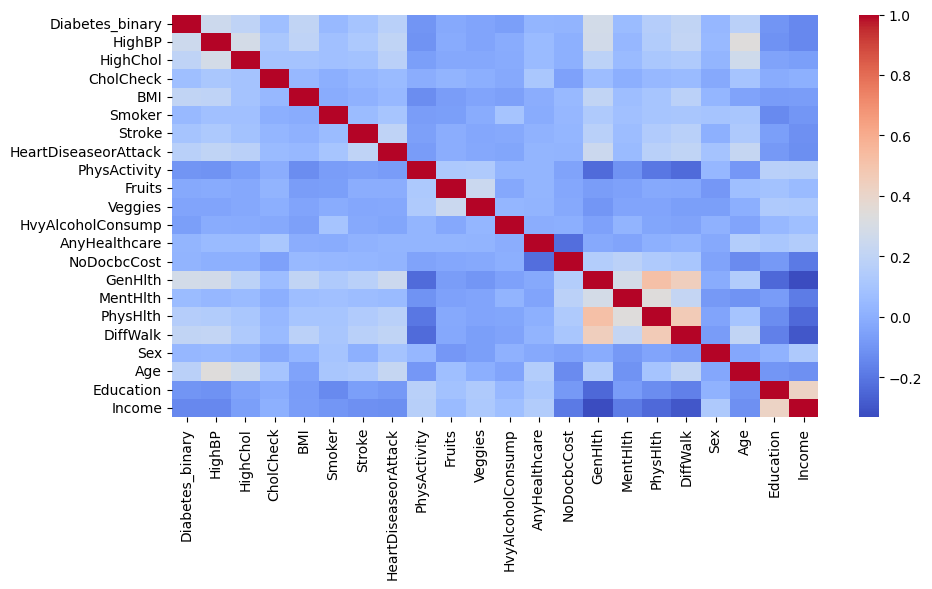

In [62]:
sns.heatmap(dfdiabetes.corr(),cmap="coolwarm")

<p>Notable Correlations</p>

Education -> Income <br/>
Age -> HighBP,CholCheck
DiffWalk -> GenHealth,PhysHealth <br/>
GenHealth -> HighBp, Diabetes_binary<br/

<p>Negative Correlations</p>
Income ->General Health, Diffwalk
Physical Activity ->Diffwalk,PhysHealth,Genhealth


In [63]:
dfdiabetes.columns.to_list()

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

<pre>

GenHlth
The metadata of the dataset indicates that patients were asked to rate their overall health status on a 1-5 scale, where:

1 = Excellent
2 = very good
3 = good
4 = fair
5 = poor

DiffWalk
Patients where asked: 'Do you have serious difficulty walking or climbing stairs?
BMI
BMI provides an estimation of the amount of body fat a person has, and is commonly used as a screening tool to identify individuals who may be at a higher risk for weight-related health problems, such as diabetes, heart disease, and certain types of cancer.
For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
If your BMI is 25.0 to 29.9, it falls within the overweight range.
If your BMI is 30.0 or higher, it falls within the obese range.

Age
MetaData explains that is patient age classification with 5 year increments, where:

1 = 18-24 years old
2 = 25-29 years old
3 = 30-34 years old
4 = 35-39 years old
5 = 40-44 years old
6 = 45-49 years old
7 = 50-54 years old
8 = 55-59 years old
9 = 60-64 years old
10 = 65-69 years old
11 = 70-74 years old
12 = 75-79 years old
13 = 80 years and older

HeartDiseaseorAttack
MetaData explains that is patient condition presence coronary heart disease (CHD) or myocardial infarction (MI).

PhysHlth
MetaData explains that is patient presence of physical illness and injury, for how many days during the past 30.

Income
MetaData explains that is patient Annual household income in dollar, where:

1 = <10,000
2 = 10,000–15,000
3 = 15,000–20,000
4 = 20,000–25,000
5 = 25,000–35,000
6 = 35,000–50,000
7 = 50,001–75,000
8 = >75,000

Education
This variable is a answer to Education level question:

What is the highest grade or year of school you completed?

1 = Never attended school or only kindergarten
2 = Grades 1 through 8 (Elementary)
3 = Grades 9 through 11 (Some high school)
4 = Grade 12 or GED (High school graduate)
5 = College 1 year to 3 years (Some college or technical school)
6 = College 4 years or more (College graduate)

PhysActivity
physical activity in past 30 days (not including job).
Addicional Analysis
Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
Stroke
(Ever told) you had a stroke.
Alcohol Consumption
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
Cholesterol Check
Cholesterol check within past five years
</pre>


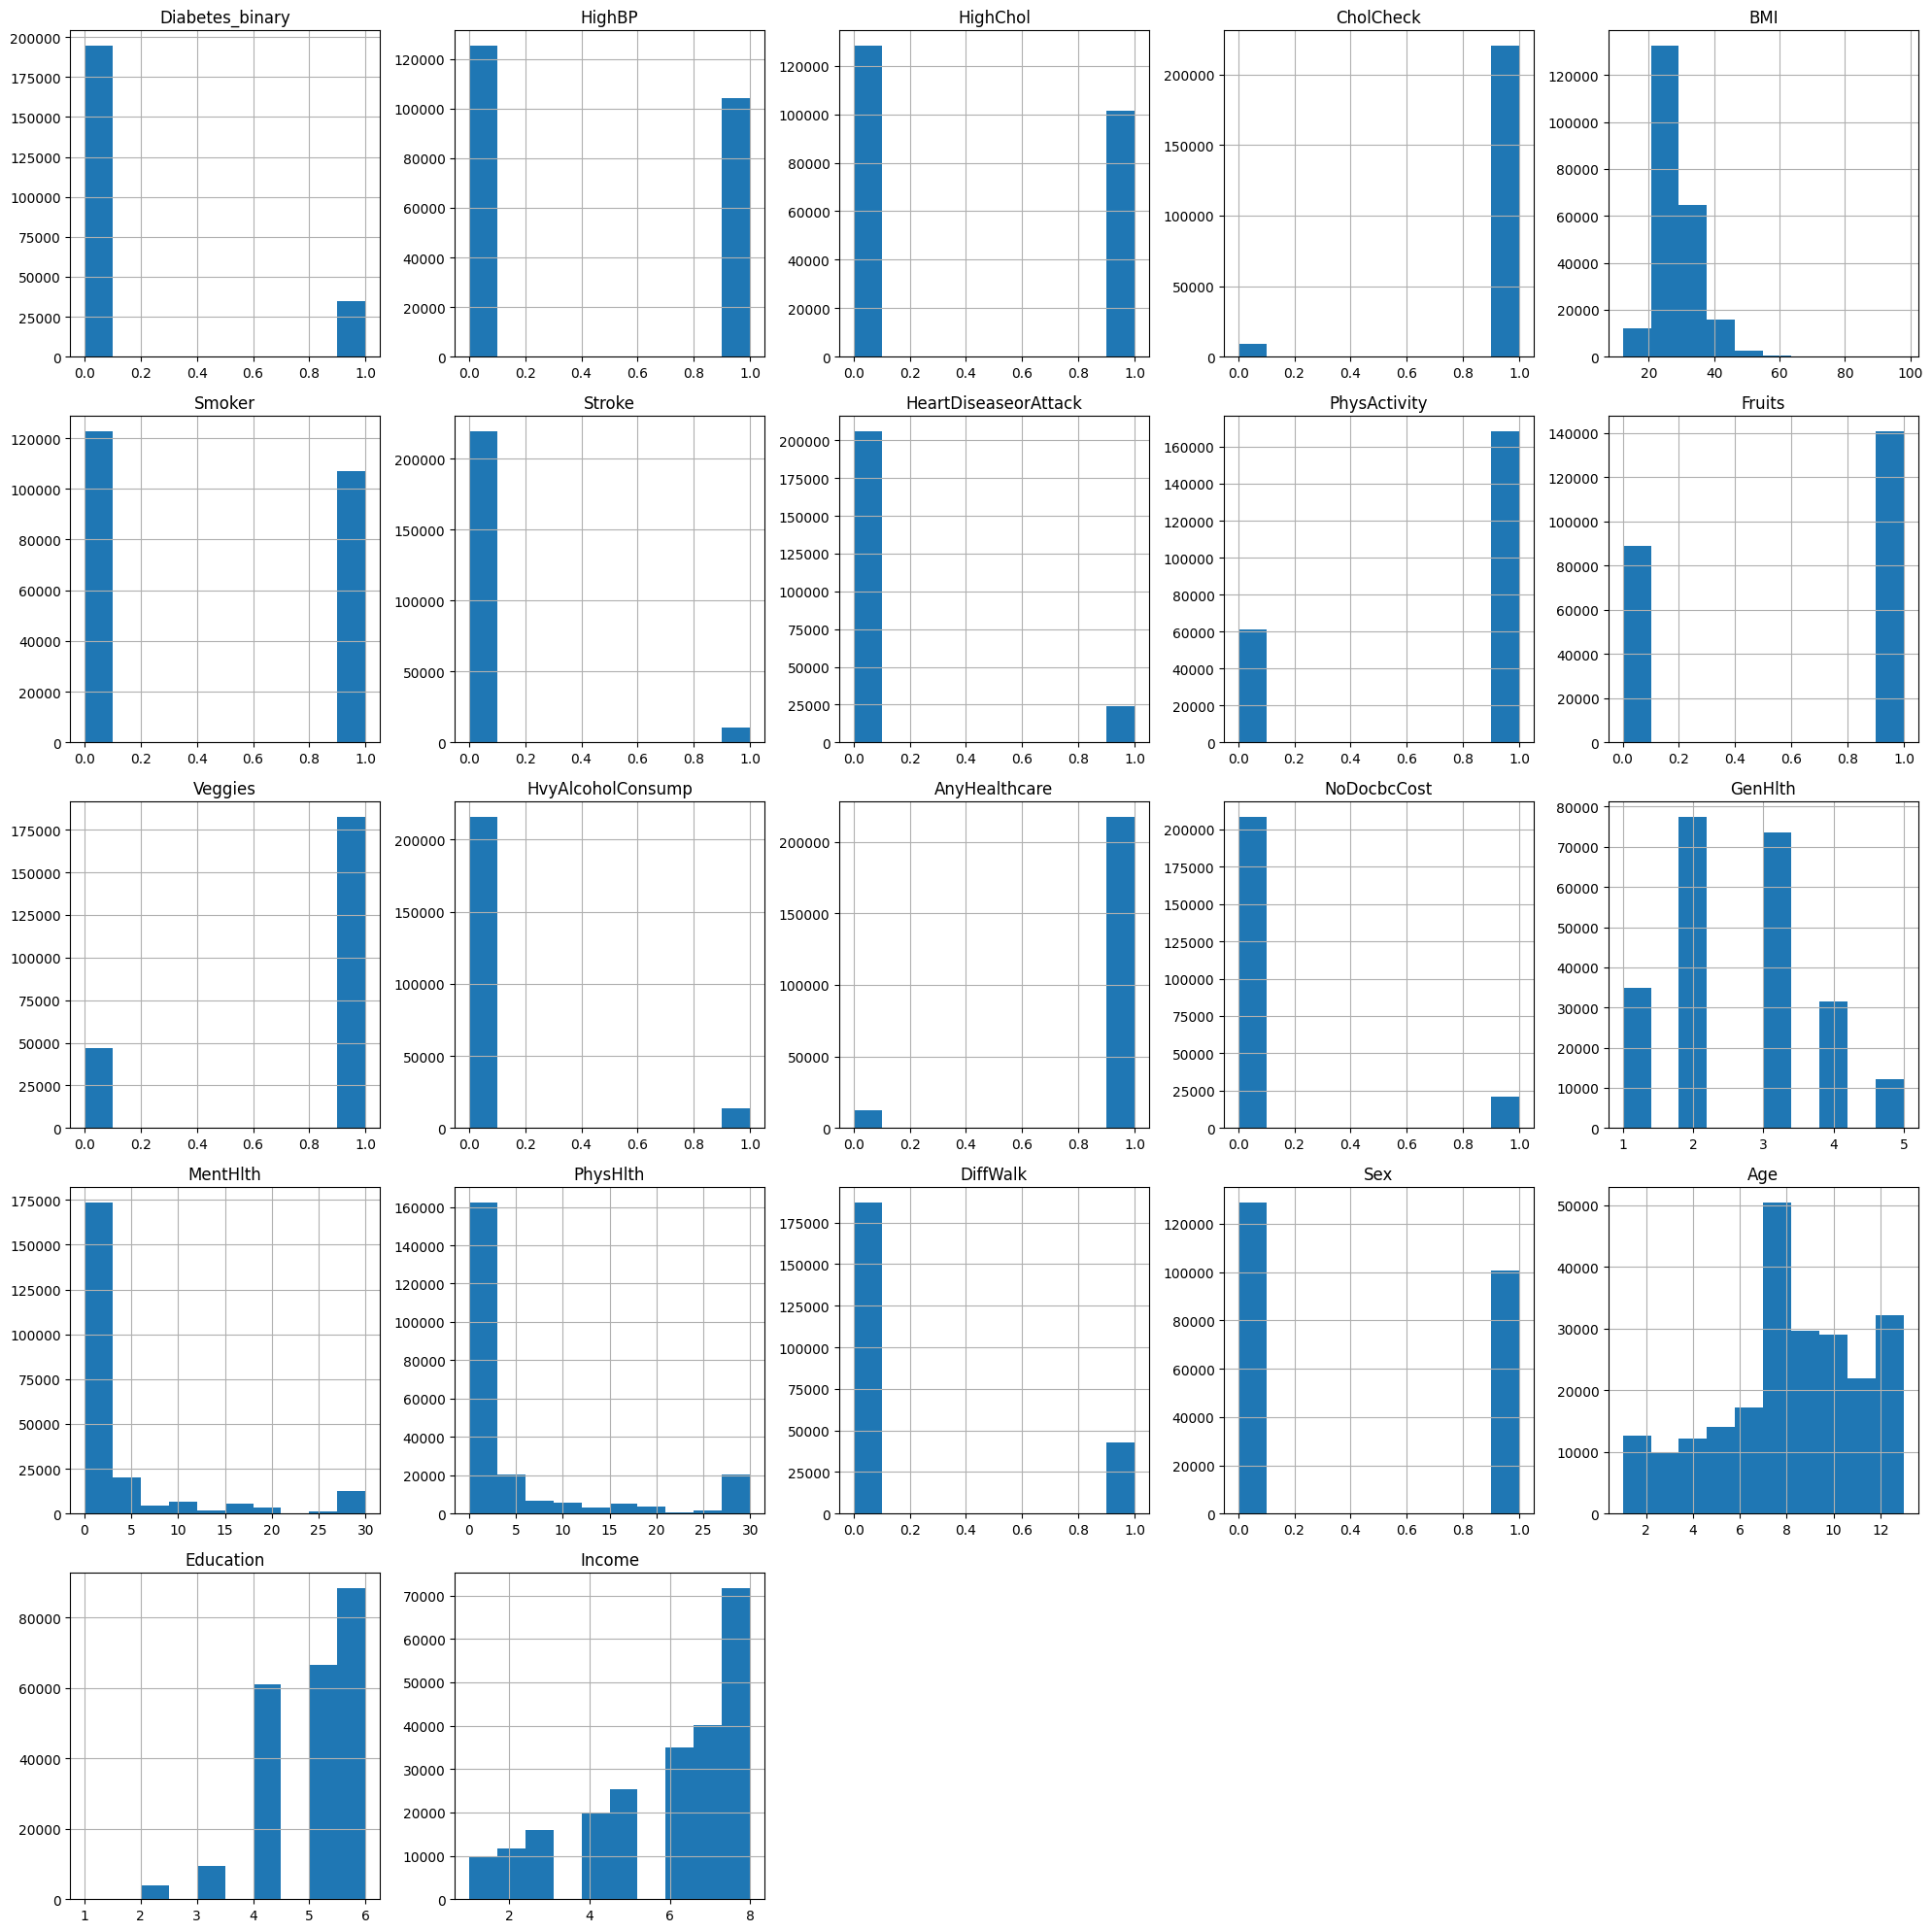

In [64]:


# #create histogram for each column in DataFrame

dfdiabetes.hist(figsize=(20,20));

C:\Users\Manjusha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


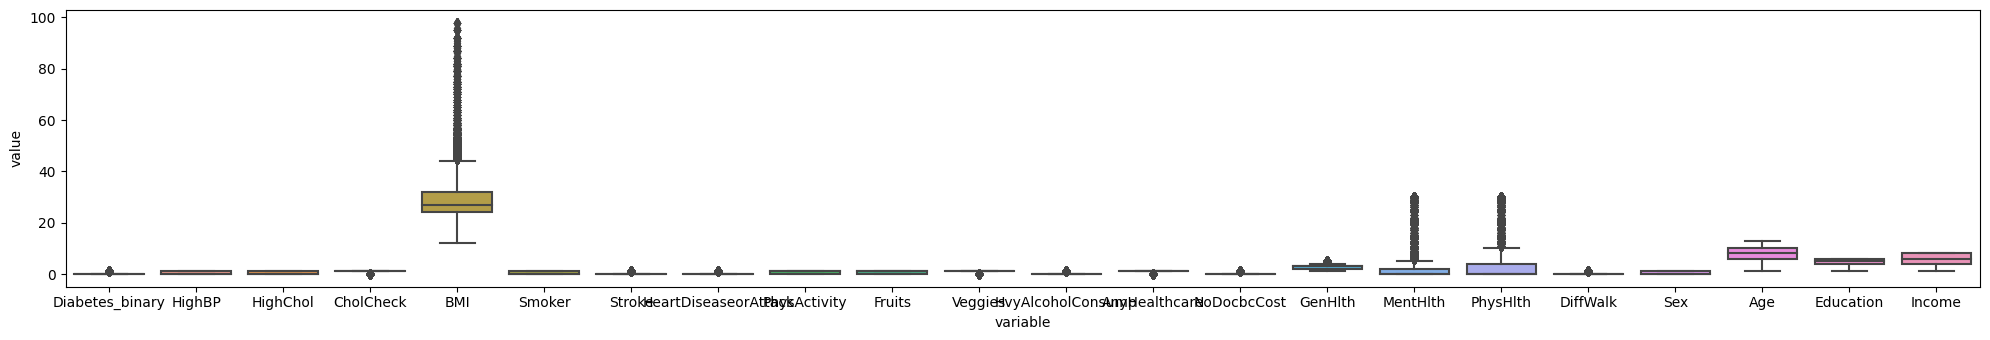

In [65]:
# Set the figure size
plt.rcParams["figure.figsize"] = [20, 3.50]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x="variable", y="value", data=pd.melt(dfdiabetes))

plt.show()

NameError: name 'plt' is not defined

In [66]:
dfdiabetes.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

<AxesSubplot: >

C:\Users\Manjusha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


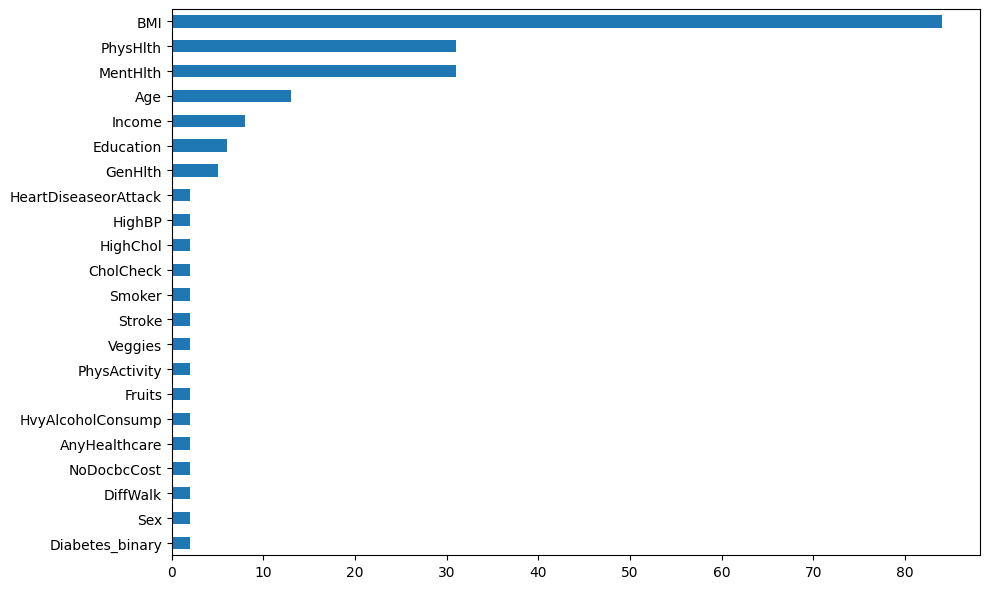

In [67]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
dfdiabetes.nunique().sort_values().plot.barh()

In [68]:
dfdiabetes_copy = dfdiabetes.copy()

In [69]:
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 1] = '18 to 24'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 2] = '25 to 29'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 3] = '30 to 34'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 4] = '35 to 39'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 5] = '40 to 44'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 6] = '45 to 49'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 7] = '50 to 54'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 8] = '55 to 59'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 9] = '60 to 64'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 10] = '65 to 69'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 11] = '70 to 74'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 12] = '75 to 79'
dfdiabetes_copy.Age[dfdiabetes_copy['Age'] == 13] = '80 or older'

dfdiabetes_copy.Diabetes_binary[dfdiabetes_copy['Diabetes_binary'] == 0] = 'No Diabetes'
dfdiabetes_copy.Diabetes_binary[dfdiabetes_copy['Diabetes_binary'] == 1] = 'Diabetes'


dfdiabetes_copy.HighBP[dfdiabetes_copy['HighBP'] == 0] = 'No High'
dfdiabetes_copy.HighBP[dfdiabetes_copy['HighBP'] == 1] = 'High BP'

dfdiabetes_copy.HighChol[dfdiabetes_copy['HighChol'] == 0] = 'No High Cholesterol'
dfdiabetes_copy.HighChol[dfdiabetes_copy['HighChol'] == 1] = 'High Cholesterol'

dfdiabetes_copy.CholCheck[dfdiabetes_copy['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
dfdiabetes_copy.CholCheck[dfdiabetes_copy['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

dfdiabetes_copy.Smoker[dfdiabetes_copy['Smoker'] == 0] = 'No'
dfdiabetes_copy.Smoker[dfdiabetes_copy['Smoker'] == 1] = 'Yes'

dfdiabetes_copy.Stroke[dfdiabetes_copy['Stroke'] == 0] = 'No'
dfdiabetes_copy.Stroke[dfdiabetes_copy['Stroke'] == 1] = 'Yes'

dfdiabetes_copy.HeartDiseaseorAttack[dfdiabetes_copy['HeartDiseaseorAttack'] == 0] = 'No'
dfdiabetes_copy.HeartDiseaseorAttack[dfdiabetes_copy['HeartDiseaseorAttack'] == 1] = 'Yes'

dfdiabetes_copy.PhysActivity[dfdiabetes_copy['PhysActivity'] == 0] = 'No'
dfdiabetes_copy.PhysActivity[dfdiabetes_copy['PhysActivity'] == 1] = 'Yes'

dfdiabetes_copy.Fruits[dfdiabetes_copy['Fruits'] == 0] = 'No'
dfdiabetes_copy.Fruits[dfdiabetes_copy['Fruits'] == 1] = 'Yes'

dfdiabetes_copy.Veggies[dfdiabetes_copy['Veggies'] == 0] = 'No'
dfdiabetes_copy.Veggies[dfdiabetes_copy['Veggies'] == 1] = 'Yes'

dfdiabetes_copy.HvyAlcoholConsump[dfdiabetes_copy['HvyAlcoholConsump'] == 0] = 'No'
dfdiabetes_copy.HvyAlcoholConsump[dfdiabetes_copy['HvyAlcoholConsump'] == 1] = 'Yes'

dfdiabetes_copy.AnyHealthcare[dfdiabetes_copy['AnyHealthcare'] == 0] = 'No'
dfdiabetes_copy.AnyHealthcare[dfdiabetes_copy['AnyHealthcare'] == 1] = 'Yes'

dfdiabetes_copy.NoDocbcCost[dfdiabetes_copy['NoDocbcCost'] == 0] = 'No'
dfdiabetes_copy.NoDocbcCost[dfdiabetes_copy['NoDocbcCost'] == 1] = 'Yes'

dfdiabetes_copy.GenHlth[dfdiabetes_copy['GenHlth'] == 5] = 'Excellent'
dfdiabetes_copy.GenHlth[dfdiabetes_copy['GenHlth'] == 4] = 'Very Good'
dfdiabetes_copy.GenHlth[dfdiabetes_copy['GenHlth'] == 3] = 'Good'
dfdiabetes_copy.GenHlth[dfdiabetes_copy['GenHlth'] == 2] = 'Fair'
dfdiabetes_copy.GenHlth[dfdiabetes_copy['GenHlth'] == 1] = 'Poor'

dfdiabetes_copy.DiffWalk[dfdiabetes_copy['DiffWalk'] == 0] = 'No'
dfdiabetes_copy.DiffWalk[dfdiabetes_copy['DiffWalk'] == 1] = 'Yes'

dfdiabetes_copy.Sex[dfdiabetes_copy['Sex'] == 0] = 'Female'
dfdiabetes_copy.Sex[dfdiabetes_copy['Sex'] == 1] = 'Male'

dfdiabetes_copy.Education[dfdiabetes_copy['Education'] == 1] = 'Never Attended School'
dfdiabetes_copy.Education[dfdiabetes_copy['Education'] == 2] = 'Elementary'
dfdiabetes_copy.Education[dfdiabetes_copy['Education'] == 3] = 'Junior High School'
dfdiabetes_copy.Education[dfdiabetes_copy['Education'] == 4] = 'Senior High School'
dfdiabetes_copy.Education[dfdiabetes_copy['Education'] == 5] = 'Undergraduate Degree'
dfdiabetes_copy.Education[dfdiabetes_copy['Education'] == 6] = 'Magister'

dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 1] = 'Less Than $10,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 2] = 'Less Than $10,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 3] = 'Less Than $10,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 4] = 'Less Than $10,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 5] = 'Less Than $35,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 6] = 'Less Than $35,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 7] = 'Less Than $35,000'
dfdiabetes_copy.Income[dfdiabetes_copy['Income'] == 8] = '$75,000 or More'

dfdiabetes_copy.head()

C:\Users\Manjusha\AppData\Local\Temp\ipykernel_8660\4079369565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdiabetes_copy.Diabetes_binary[dfdiabetes_copy['Diabetes_binary'] == 0] = 'No Diabetes'
C:\Users\Manjusha\AppData\Local\Temp\ipykernel_8660\4079369565.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdiabetes_copy.HighBP[dfdiabetes_copy['HighBP'] == 0] = 'No High'
C:\Users\Manjusha\AppData\Local\Temp\ipykernel_8660\4079369565.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Excellent,18.0,15.0,Yes,Female,60 to 64,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,50 to 54,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Excellent,30.0,30.0,Yes,Female,60 to 64,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,0.0,No,Female,70 to 74,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Fair,3.0,0.0,No,Female,70 to 74,Undergraduate Degree,"Less Than $10,000"


C:\Users\Manjusha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


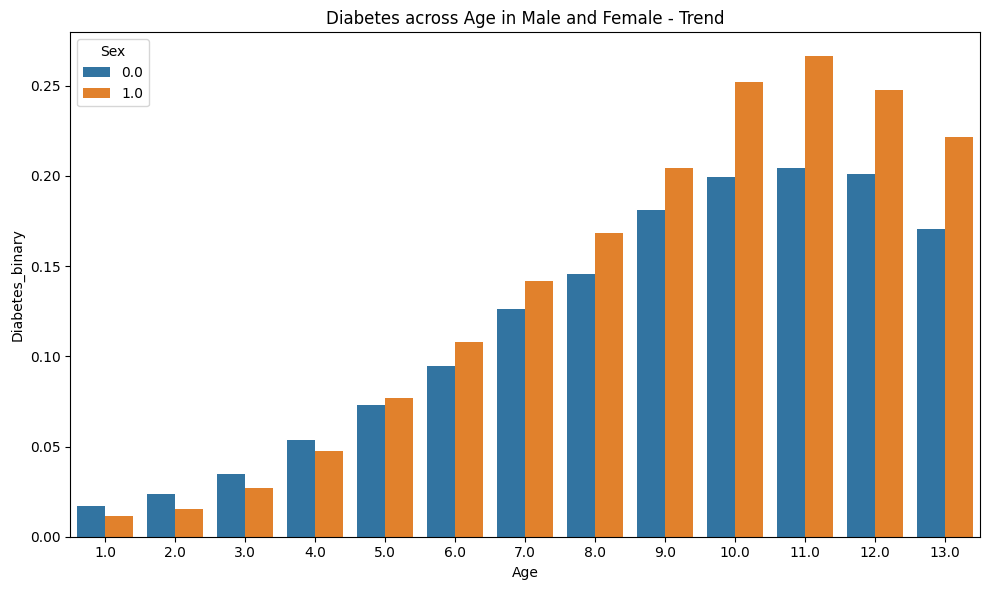

In [70]:
#black line indicates the uncertainty around that estimate using error bars but can be turned off by ci=None
# change the x and y attributes and make the plot horizontal
bplot = sns.barplot(data=dfdiabetes,
            x="Age",
            y="Diabetes_binary",
            hue="Sex",
            errorbar=None
            )

#format the percentage values
#vals = bplot.get_yticks()
#print(vals)
#bplot.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.title("Diabetes across Age in Male and Female - Trend");

C:\Users\Manjusha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


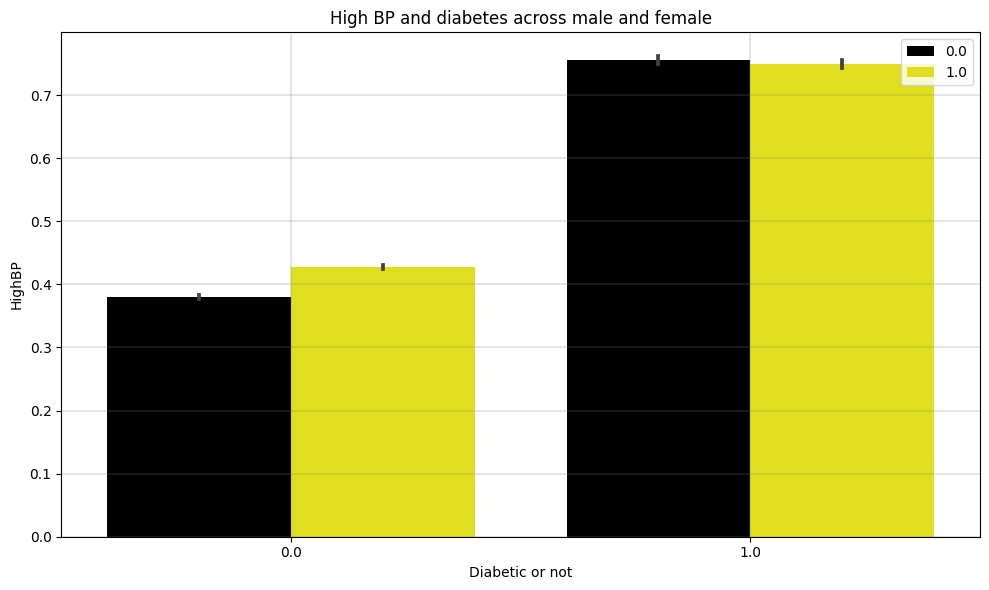

In [71]:
#A grouped bar plot
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#black line indicates the uncertainty around that estimate using error bars.

#define graph size
#plt.figure(figsize = (12,5))
color = ['black','yellow','green']

bplot = sns.barplot(data=dfdiabetes,            
            x="Diabetes_binary",
            y="HighBP",
            hue="Sex",
            palette=color
            )


plt.title("High BP and diabetes across male and female")
plt.xlabel("Diabetic or not")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# add legend and set position to upper right
plt.legend(loc='upper right');

C:\Users\Manjusha\AppData\Local\Temp\ipykernel_8660\870353344.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Manjusha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


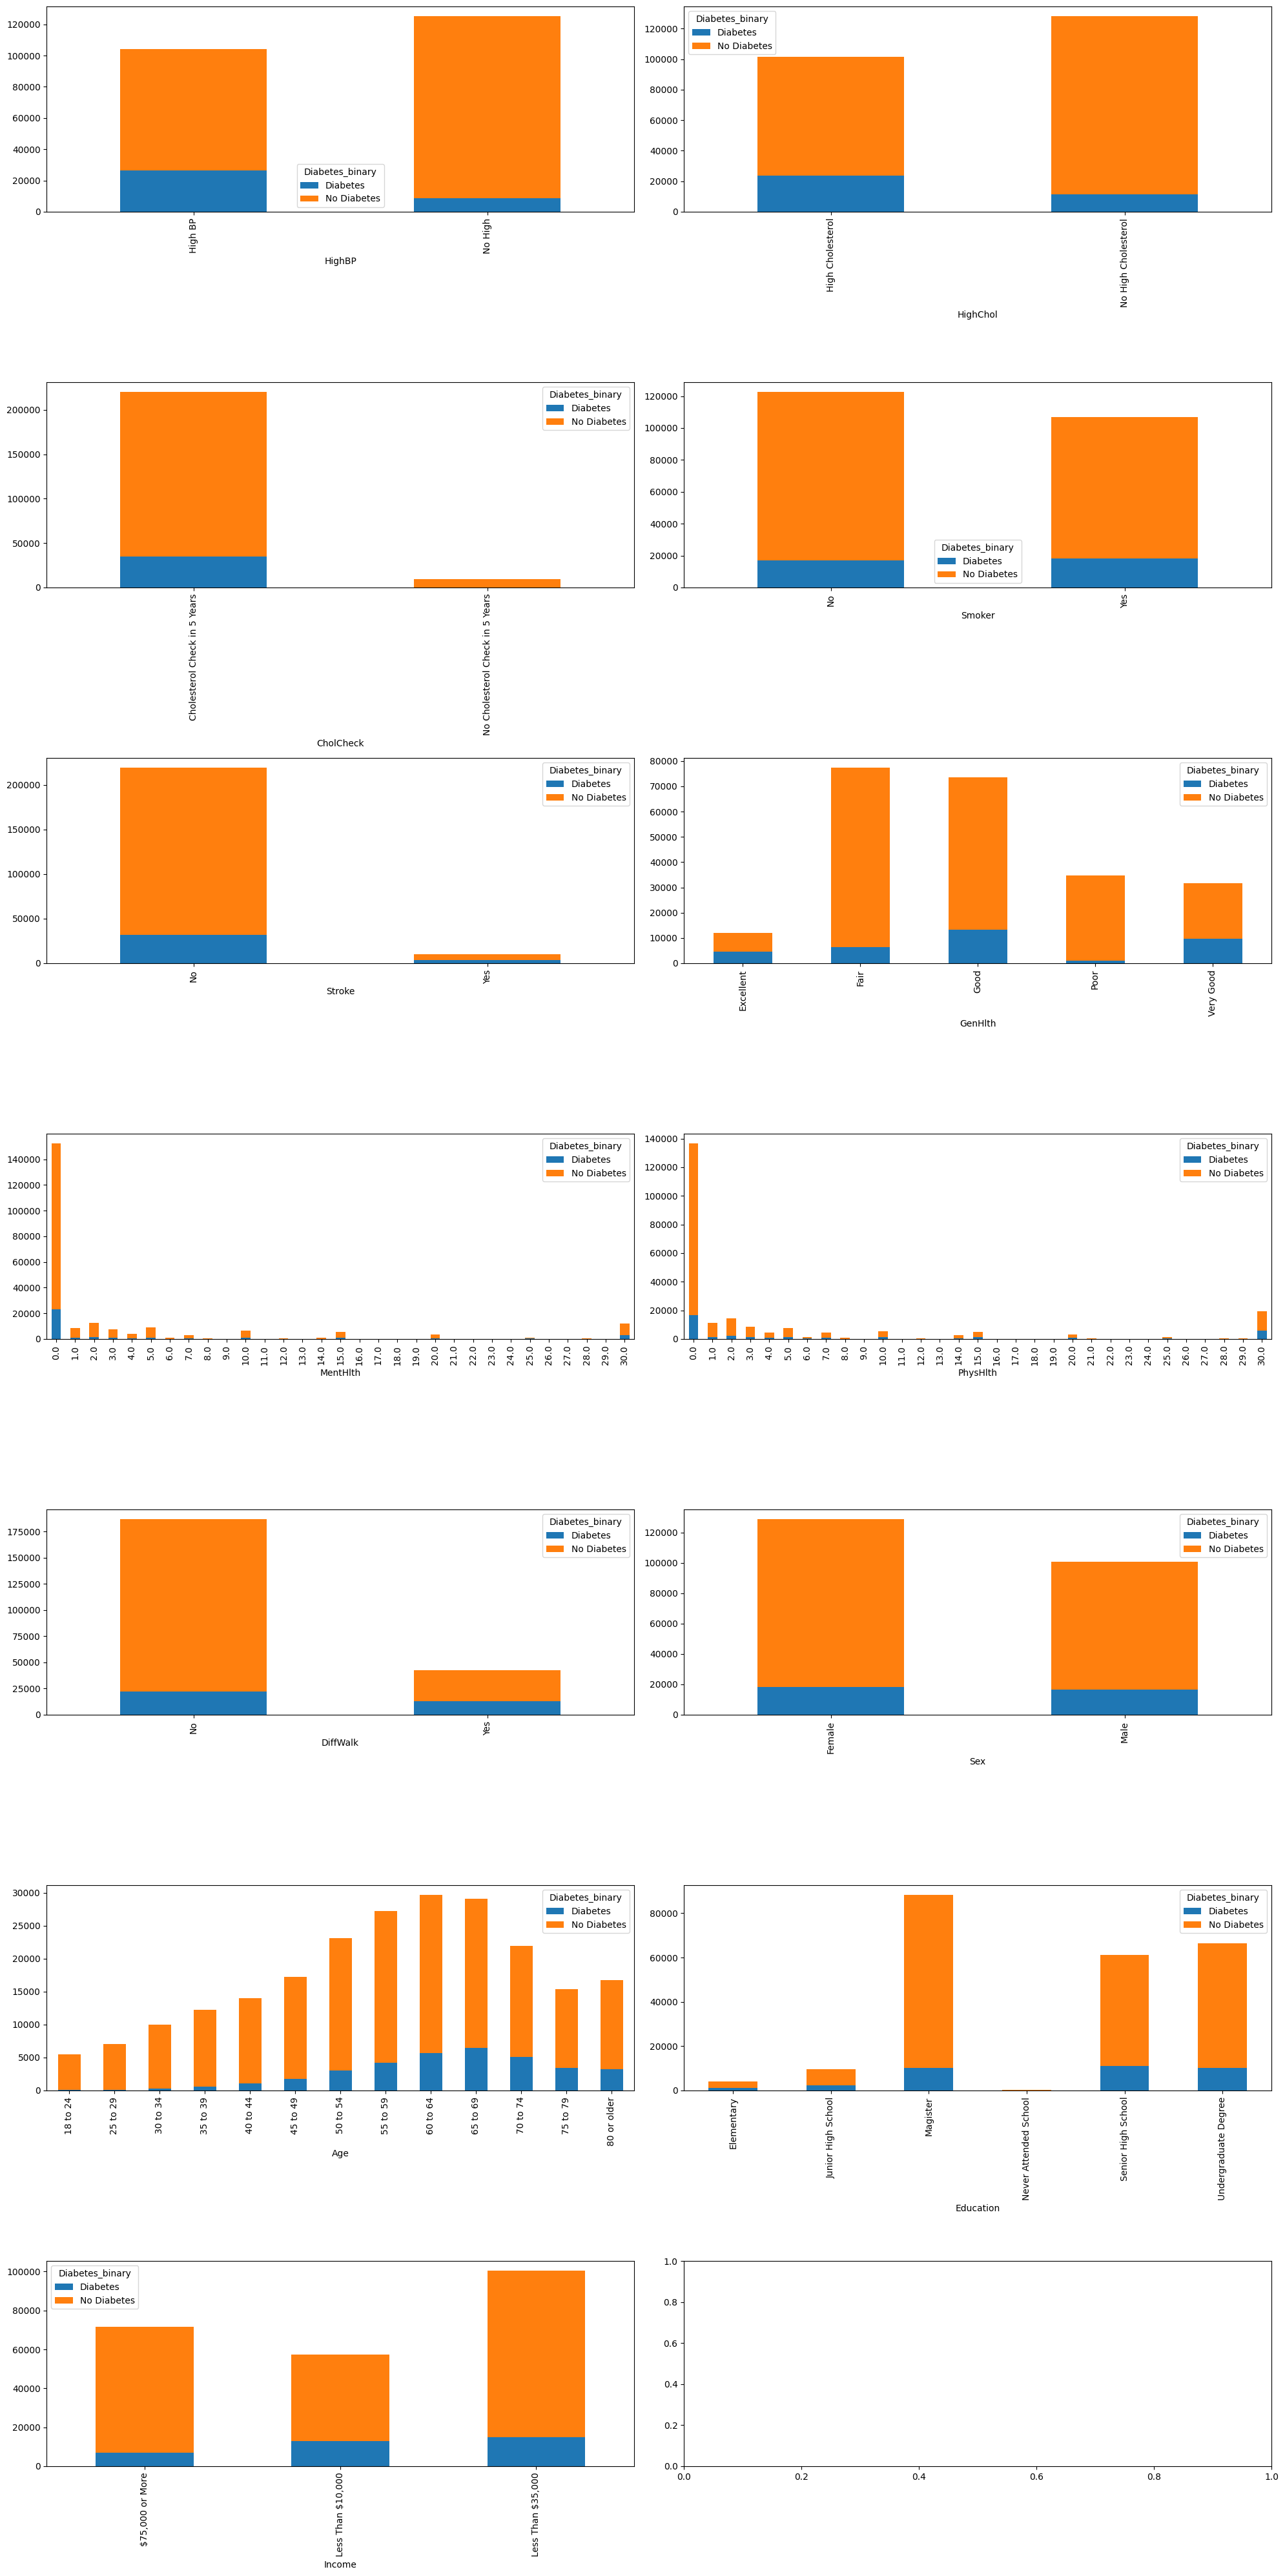

In [72]:
cols = [ 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex','Age','Education','Income' ]
def create_plot_pivot(dfdiabetes_copy, x_column):
    _df_plot = dfdiabetes_copy.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

fig, ax = plt.subplots(7, 2, figsize=(20,40))
axe = ax.ravel()

for i in range(len(cols)):
    create_plot_pivot(dfdiabetes_copy, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()